In [53]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Activation, Dropout, BatchNormalization, Flatten
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [49]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
y_train[120]

array([2], dtype=uint8)

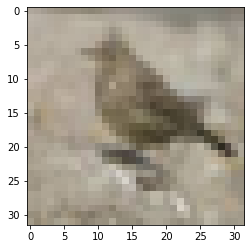

In [38]:
plt.imshow(x_train[120])

In [50]:
#z-score scaling
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

num_classes = 10
## One hot Encoding target variable - Binary
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


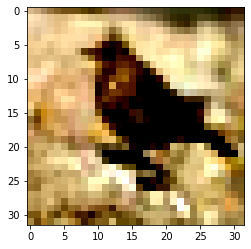

In [48]:
plt.imshow(x_train[120])

In [52]:
x_train.shape[1:]

(32, 32, 3)

In [64]:
## Defining the model architecture
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding='same', input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size= (3,3), padding='same', strides = (1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))


In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)             

In [66]:
## Data Augmentation
datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15)
datagen.fit(x_train)

In [67]:
## Training
batch_size = 128

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer="rmsprop")
model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), 
          epochs=10, steps_per_epoch = x_train.shape[0]//batch_size,
          validation_data=(x_test,y_test))

Epoch 1/10
390/390 [==============================] - 45s 116ms/step - loss: 1.4999 - accuracy: 0.4657 - val_loss: 1.2471 - val_accuracy: 0.5520
Epoch 2/10
390/390 [==============================] - 44s 113ms/step - loss: 1.2195 - accuracy: 0.5716 - val_loss: 1.1312 - val_accuracy: 0.6098
Epoch 3/10
390/390 [==============================] - 45s 116ms/step - loss: 1.1225 - accuracy: 0.6091 - val_loss: 1.0791 - val_accuracy: 0.6292
Epoch 4/10
390/390 [==============================] - 45s 114ms/step - loss: 1.0646 - accuracy: 0.6308 - val_loss: 1.1862 - val_accuracy: 0.6045
Epoch 5/10
390/390 [==============================] - 44s 113ms/step - loss: 1.0215 - accuracy: 0.6474 - val_loss: 0.9468 - val_accuracy: 0.6801
Epoch 6/10
390/390 [==============================] - 44s 113ms/step - loss: 0.9935 - accuracy: 0.6569 - val_loss: 0.9604 - val_accuracy: 0.6756
Epoch 7/10
390/390 [==============================] - 46s 118ms/step - loss: 0.9687 - accuracy: 0.6649 - val_loss: 0.9356 - val_ac